In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


In [2]:
df = pd.read_csv('archive/flights.csv')

/var/folders/2w/hy3qhkf90ld86v626flq0kb80000gn/T/ipykernel_4988/3945313329.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archive/flights.csv')


In [ ]:
df=df.drop(["TAIL_NUMBER",'DAY_OF_WEEK','AIRLINE',"CANCELLATION_REASON",'YEAR','DAY', 'FLIGHT_NUMBER','TAIL_NUMBER', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'ELAPSED_TIME','WHEELS_ON', 'TAXI_IN',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],axis=1)

In [4]:
# df[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']] = df[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].fillna(0)

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (object or string types)
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding column by column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # convert to string to avoid NaN issues

print(df.head())

   MONTH  ORIGIN_AIRPORT  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1             323                  584                    5   
1      1             482                  542                   10   
2      1             584                  373                   20   
3      1             482                  510                   20   
4      1             583                  324                   25   

   DEPARTURE_TIME  SCHEDULED_TIME  AIR_TIME  DISTANCE  SCHEDULED_ARRIVAL  \
0          2354.0           205.0     169.0      1448                430   
1             2.0           280.0     263.0      2330                750   
2            18.0           286.0     266.0      2296                806   
3            15.0           285.0     258.0      2342                805   
4            24.0           235.0     199.0      1448                320   

   ARRIVAL_TIME  ARRIVAL_DELAY  
0         408.0          -22.0  
1         741.0           -9.0  
2         811.0        

In [6]:
result=[]
for row in df['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)

In [7]:
df=df.drop(['ARRIVAL_DELAY'],axis=1)

In [8]:
df['result'] = result

In [70]:
# print("NaN count for each column:")
# print(df.isna().sum())
df = df.dropna(subset=['DEPARTURE_TIME', 'SCHEDULED_TIME', 'ARRIVAL_TIME', 'AIR_TIME','result'])
# print("NaN count for each column:")
# print(df.isna().sum())
df.columns

Index(['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'SCHEDULED_TIME', 'AIR_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'result'],
      dtype='object')

In [10]:
# df=df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
# df.columns

In [11]:
X = df.iloc[:, :-1]   # all rows, all columns except last
y = df.iloc[:, -1]    # last column as target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [62]:
from sklearn.neural_network import MLPClassifier
clf = clf = RandomForestClassifier(
    random_state=42)
# AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
pred = clf.predict(X_test)

In [64]:
auc_score = roc_auc_score(y_test, pred)
auc_score

0.9835605310800833

In [65]:
print('AUC Score of Model is: {} %'.format(round(auc_score*100,2)))

AUC Score of Model is: 98.36 %


In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result1)
print('')
result2 = classification_report(y_test, pred)
print("Classification Report:",)
print (result2)
result3 = accuracy_score(y_test,pred)
print("Accuracy:",result3)

Confusion Matrix:
[[1404714    2039]
 [   9663  297787]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1406753
           1       0.99      0.97      0.98    307450

    accuracy                           0.99   1714203
   macro avg       0.99      0.98      0.99   1714203
weighted avg       0.99      0.99      0.99   1714203

Accuracy: 0.9931735039548991


Text(0.5, 427.9555555555555, 'Predicted label')

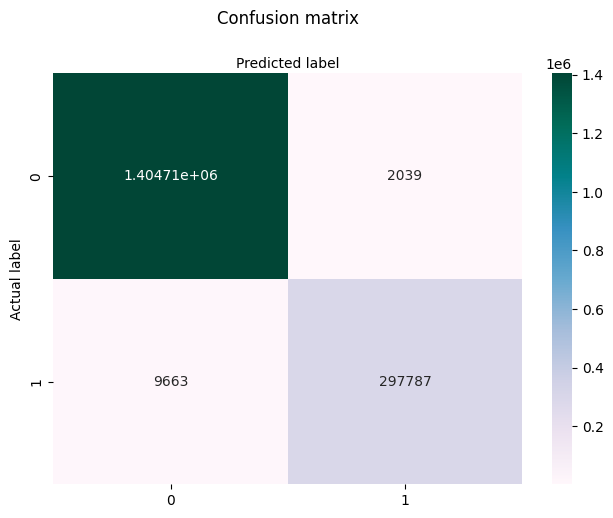

In [67]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(result1), annot=True, cmap="PuBuGn" ,fmt='g')## visualized confusion matrix using heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

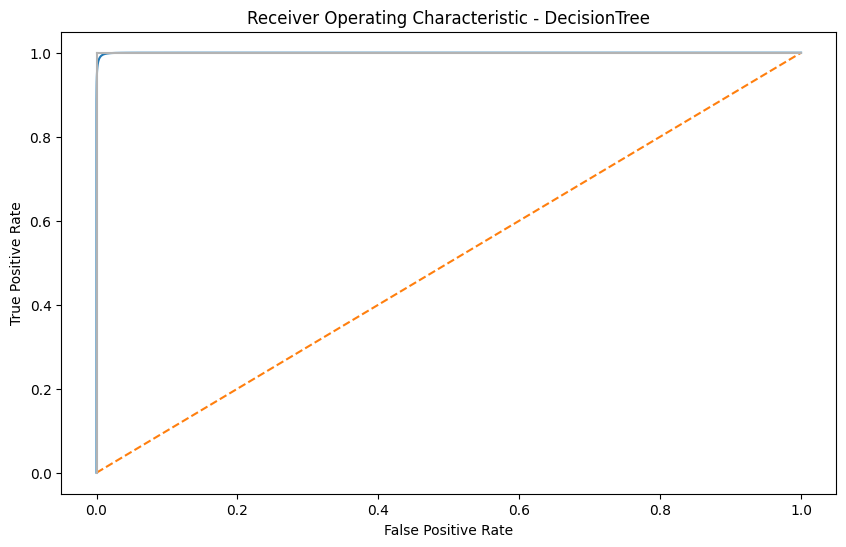

In [68]:
plt.subplots(1, figsize=(10,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Accuracy, Precision, and Recall achived by model.

In [69]:
print("Accuracy Achieved:",round(metrics.accuracy_score(y_test, pred)*100,2),'%')
print(' ')
print("Precision Achieved:",round(metrics.precision_score(y_test, pred)*100,2),'%')
print(' ')
print("Recall Achieved:",round(metrics.recall_score(y_test, pred)*100,2),'%')

Accuracy Achieved: 99.32 %
 
Precision Achieved: 99.32 %
 
Recall Achieved: 96.86 %
